In [9]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [11]:
#punto 1: base de datos
#codigo para la implementacion de esta directamente sacado de la pagina dada
# esta base de datos es un estudio de los casos de hepatitis c en pacientes
from ucimlrepo import fetch_ucirepo  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import hvplot.pandas
from scipy import stats
  
# fetch dataset 
hepatitis_c_virus_hcv_for_egyptian_patients = fetch_ucirepo(id=503) 
  
# data (as pandas dataframes) 
X = hepatitis_c_virus_hcv_for_egyptian_patients.data.features 
y = hepatitis_c_virus_hcv_for_egyptian_patients.data.targets 
  
# metadata 
print(hepatitis_c_virus_hcv_for_egyptian_patients.metadata) 
  
# variable information 
print(hepatitis_c_virus_hcv_for_egyptian_patients.variables) 

%matplotlib inline

sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

{'uci_id': 503, 'name': 'Hepatitis C Virus (HCV) for Egyptian patients', 'repository_url': 'https://archive.ics.uci.edu/dataset/503/hepatitis+c+virus+hcv+for+egyptian+patients', 'data_url': 'https://archive.ics.uci.edu/static/public/503/data.csv', 'abstract': 'Egyptian patients who underwent treatment dosages for HCV about 18 months. Discretization should be applied based on expert recommendations; there is an attached file shows how.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1385, 'num_features': 28, 'feature_types': ['Real'], 'demographics': ['Age', 'Gender'], 'target_col': ['Baselinehistological staging'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2017, 'last_updated': 'Tue Apr 09 2024', 'dataset_doi': '10.24432/C5989V', 'creators': ['Sanaa Kamal', 'Mohamed ElEleimy', 'Doaa Hegazy', 'Mahmoud Nasr'], 'intro_paper': {'ID': 232, 'type': 'NATIVE', 'ti

Datos corregidos:
   Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
0    56       0   35      2               1          1          1   
1    46       0   29      1               2          2          1   
2    57       0   33      2               2          2          2   
3    49       1   33      1               2          1          2   
4    59       0   32      1               1          2          1   

   Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  ALT 36  \
0                                 2          2                 2  ...       5   
1                                 2          2                 1  ...      57   
2                                 1          1                 1  ...       5   
3                                 1          2                 1  ...      48   
4                                 2          2                 2  ...      94   

   ALT 48  ALT after 24 w  RNA Base   RNA 4   RNA 12  RNA EOT  RNA EF  \
0      

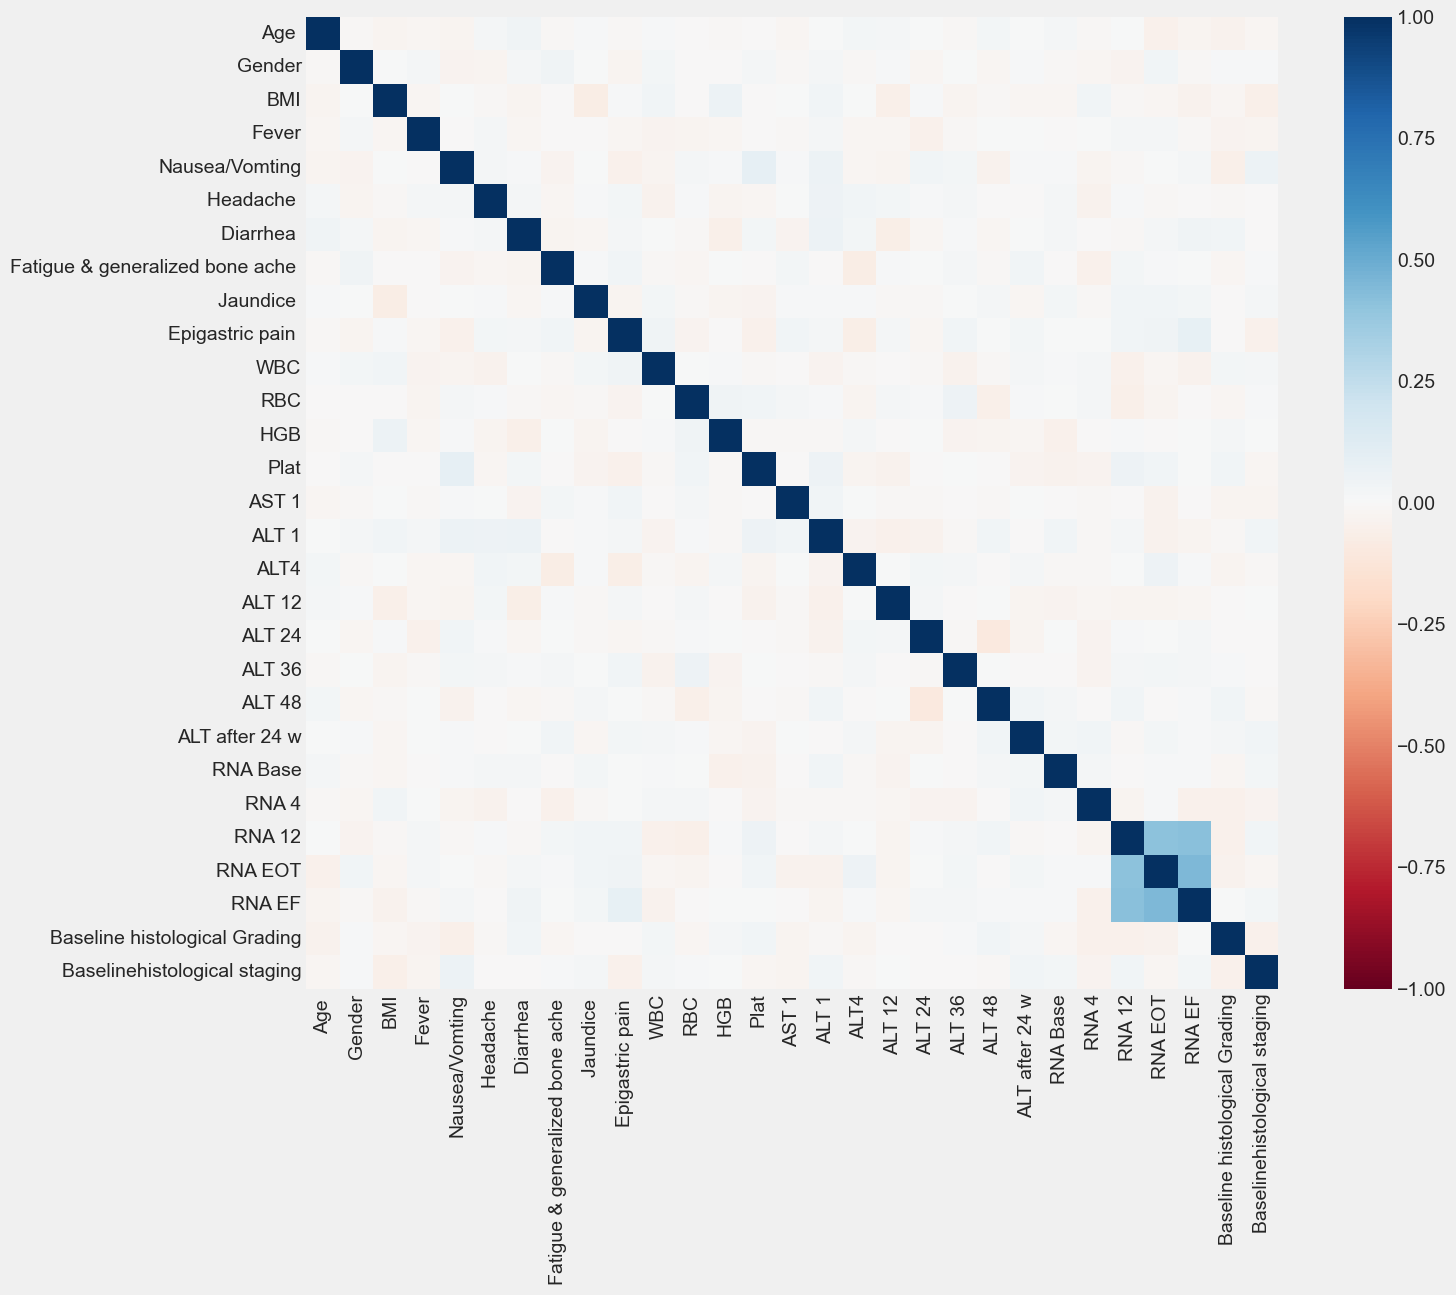

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RANSACRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Cargar datos
hepatitis_c_virus_hcv_for_egyptian_patients = fetch_ucirepo(id=503)
X = hepatitis_c_virus_hcv_for_egyptian_patients.data.features
y = hepatitis_c_virus_hcv_for_egyptian_patients.data.targets

# Agrupar en un DataFrame
df = pd.concat([X, y], axis=1)

# Convertir a enteros las columnas específicas
df['RBC'] = df['RBC'].astype(int)
df['Plat'] = df['Plat'].astype(int)
df['ALT4'] = df['ALT4'].astype(int)

# Convertir 'Gender' a valores numéricos
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Verificación de datos
print("Datos corregidos:")
print(df.head())
print(df.describe())
print(df.info())

# Mapa de calor de correlaciones
corrmat = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=1, vmin=-1, square=True, cmap='RdBu')
plt.show()

# Selección de características y target
X = df[['Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache ', 'Diarrhea ', 
        'Fatigue & generalized bone ache ', 'Jaundice ', 'Epigastric pain ', 
        'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1', 'ALT4', 'ALT 12', 
        'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w', 'RNA Base', 'RNA 4', 
        'RNA 12', 'RNA EOT', 'RNA EF', 'Baseline histological Grading']]
y = df['Age ']

# Estandarización de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# support vector machine

In [21]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Si aún no has definido results_df, crea un DataFrame vacío o inicializado con datos.
results_df = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])

min_samples = min(len(X_scaled), len(y))
X_scaled = X_scaled[:min_samples]
y = y[:min_samples]

# Espacio de búsqueda de hiperparámetros
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],  # Tipos de kernel permitidos por SVR
    'C': [0.1, 1, 10, 100],  # Parámetro de regularización
    'epsilon': [0.01, 0.1, 0.5, 1],  # Margen de insensibilidad
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]  # Parámetro gamma (para rbf y poly)
}

# Crear el modelo SVR
svr = SVR()

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=svr,
    param_grid=param_grid,
    cv=5,  # Validación cruzada
    scoring='neg_mean_squared_error',  # Métrica de evaluación
    verbose=2,
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Ajustar el modelo
grid_search.fit(X_scaled, y)  # Asegúrate de usar los datos escalados

# Resultados
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntaje (neg MSE):", grid_search.best_score_)

def cross_val(model):
    pred = cross_val_score(model, X_scaled, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print(f'MAE: {mae:0.2f}')
    print(f'MSE: {mse:0.2f}')
    print(f'RMSE:: {rmse:0.2f}')
    print(f'R2 Square: {r2_square:0.2f}')
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

{'C': 100, 'epsilon': 1, 'gamma': 1, 'kernel': 'rbf'}

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df,results_df_2])




Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Mejores hiperparámetros: {'C': 100, 'epsilon': 1, 'gamma': 1, 'kernel': 'rbf'}
Mejor puntaje (neg MSE): -13147.036492602856
Test set evaluation:
_____________________________________
MAE: 8.73
MSE: 105.90
RMSE:: 10.29
R2 Square: -0.34
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.00
MSE: 0.00
RMSE:: 0.00
R2 Square: 1.00
__________________________________


C:\Users\migue\AppData\Local\Temp\ipykernel_15344\2704615640.py:77: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df,results_df_2])


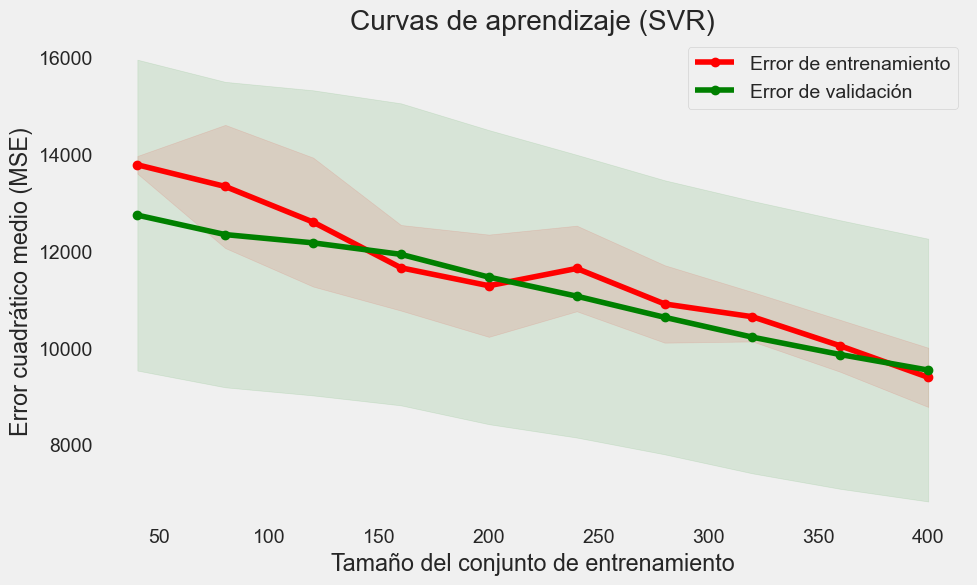

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Generar datos de ejemplo
X, y = make_regression(n_samples=500, n_features=5, noise=0.1, random_state=42)

# Crear un pipeline (normalización + SVR)
model = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=1.0, epsilon=0.1))

# Generar curvas de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model,                # Modelo
    X=X,                            # Características
    y=y,                            # Target
    train_sizes=np.linspace(0.1, 1.0, 10),  # Tamaño del conjunto de entrenamiento
    cv=5,                           # Validación cruzada con 5 particiones
    scoring='neg_mean_squared_error',  # Métrica de evaluación (error cuadrático medio negativo)
    n_jobs=-1                       # Paralelización
)

# Calcular promedios y desviaciones estándar
train_mean = -train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = -val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

# Graficar curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Error de entrenamiento")
plt.plot(train_sizes, val_mean, 'o-', color="g", label="Error de validación")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="g", alpha=0.1)
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Error cuadrático medio (MSE)")
plt.title("Curvas de aprendizaje (SVR)")
plt.legend()
plt.grid()
plt.show()
